In [ ]:
import pandas as pd

def load_cleaned_data():
    return pd.read_csv('wuwa_clean.csv', parse_dates=['at'])

df = load_cleaned_data()

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22443 entries, 0 to 22442
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              22443 non-null  object        
 1   userName              22443 non-null  object        
 2   userImage             22443 non-null  object        
 3   content               22443 non-null  object        
 4   score                 22443 non-null  int64         
 5   thumbsUpCount         22443 non-null  int64         
 6   reviewCreatedVersion  22443 non-null  object        
 7   at                    22443 non-null  datetime64[ns]
 8   appVersion            22443 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.5+ MB


In [ ]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
 
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
 
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text
 
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text
 
def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text
 
def filteringText(text):  # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))

    listStopwords.update(listStopwords1)

    # Tambahan stopwords khas game/chat
    listStopwords.update([
        'iya','yaa','gak','nya','na','sih','ku','di','ga','ya','gaa',
        'loh','kah','woi','woii','woy','lah','dong','eh','kan','aja',
        'nih','deh','kok','oh','hmm','haha','hehe','anjay','mantap',
        'makasih','makasi','thanks','thankyou','terima','kasih'
    ])

    filtered = [txt for txt in text if txt not in listStopwords]
    return filtered
 
def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
 
    # Memecah teks menjadi daftar kata
    words = text.split()
 
    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]
 
    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)
 
    return stemmed_text
 
def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
slangwords = {
    "@": "di",
    "abis": "habis",
    "masi": "masih",
    "bgt": "banget",
    "maks": "maksimal",
    "wtb": "beli",
    "wts": "jual",
    "wtt": "tukar",
    "topup": "isi saldo",
    "gacha": "undian",
    "reroll": "ulang akun",
    "noob": "pemula",
    "op": "sangat kuat",
    "meta": "strategi terbaik",
    "grind": "farming",
    "farm": "mengumpulkan",
    "drop": "jatuhan",
    "cc": "kontrol musuh",
    "afk": "tidak aktif",
    "dc": "terputus",
    "buff": "penguatan",
    "nerf": "pelemahan",
    "skill": "kemampuan",
    "ult": "ultimate",
    "cd": "cooldown",
    "atk": "serang",
    "hp": "darah",
    "def": "pertahanan",
    "crit": "serangan kritikal",
    "grapik": "grafik"
}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [5]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
df['text_clean'] = df['content'].apply(cleaningText)
 
# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
df['text_casefoldingText'] = df['text_clean'].apply(casefoldingText)
 
# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
df['text_slangwords'] = df['text_casefoldingText'].apply(fix_slangwords)
 
# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
df['text_tokenizingText'] = df['text_slangwords'].apply(tokenizingText)
 
# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
df['text_stopword'] = df['text_tokenizingText'].apply(filteringText)
 
# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
df['text_akhir'] = df['text_stopword'].apply(toSentence)

In [6]:
df.sample(3)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
2635,9eac8a40-a130-4d63-8180-869d85552836,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Sebenernya sudah bagus, tapi kok ketika saya m...",4,0,1.0.0,2024-05-26 18:29:33,1.0.0,Sebenernya sudah bagus tapi kok ketika saya ma...,sebenernya sudah bagus tapi kok ketika saya ma...,sebenernya sudah bagus tapi kok ketika saya ma...,"[sebenernya, sudah, bagus, tapi, kok, ketika, ...","[sebenernya, bagus, main, grafik, lingkungan, ...",sebenernya bagus main grafik lingkungan bagus ...
2050,357337a0-1e08-4a90-9e70-21263ae3ee92,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tolong Developer, Setelah update malah makin m...",2,0,1.1.0,2024-06-30 21:04:45,1.1.0,Tolong Developer Setelah update malah makin ma...,tolong developer setelah update malah makin ma...,tolong developer setelah update malah makin ma...,"[tolong, developer, setelah, update, malah, ma...","[tolong, developer, update, macet, macet, aman...",tolong developer update macet macet aman main ...
7857,d3a70112-d32b-4cdd-8e9d-40395e10c209,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Semoga kedepannya semakin menarik quest dan re...,5,0,1.0.0,2025-02-08 17:43:01,1.0.0,Semoga kedepannya semakin menarik quest dan re...,semoga kedepannya semakin menarik quest dan re...,semoga kedepannya semakin menarik quest dan re...,"[semoga, kedepannya, semakin, menarik, quest, ...","[semoga, kedepannya, menarik, quest, reward, t...",semoga kedepannya menarik quest reward terimak...


### Labelling

In [7]:
import csv
import requests
from io import StringIO
 
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
 
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
 
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

In [8]:
# Fungsi untuk menentukan polaritas sentimen dari tweet
def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen
 
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen
 
    polarity=''
 
    if (score > 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
 
    else:
        polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan
 
    return score, polarity

In [9]:
results = df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())

polarity
positive    9515
negative    7861
neutral     5067
Name: count, dtype: int64


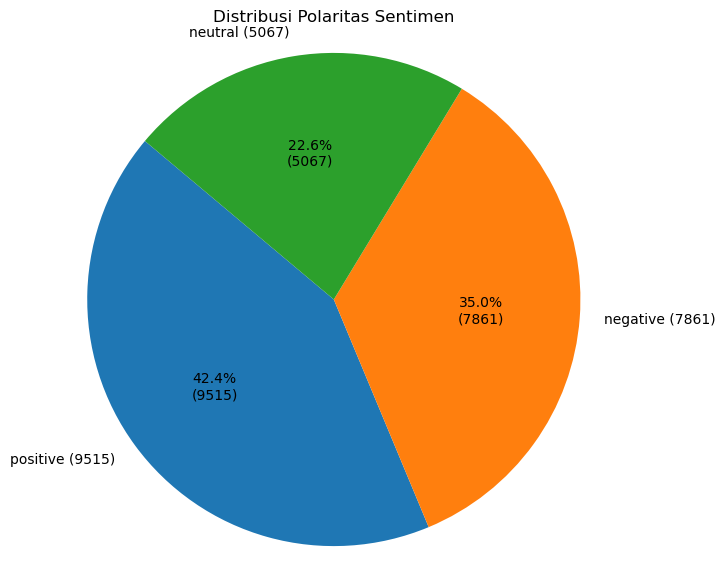

In [10]:
import matplotlib.pyplot as plt

# Hitung frekuensi masing-masing label polaritas
polarity_counts = df['polarity'].value_counts()

# Buat label kustom: label + jumlah + persen
labels = [f"{label} ({count})" for label, count in zip(polarity_counts.index, polarity_counts)]

# Fungsi untuk menampilkan persentase
def autopct_format(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{pct:.1f}%\n({absolute})"

# Pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    polarity_counts,
    labels=labels,
    autopct=lambda pct: autopct_format(pct, polarity_counts),
    startangle=140
)
plt.title('Distribusi Polaritas Sentimen')
plt.axis('equal')
plt.show()

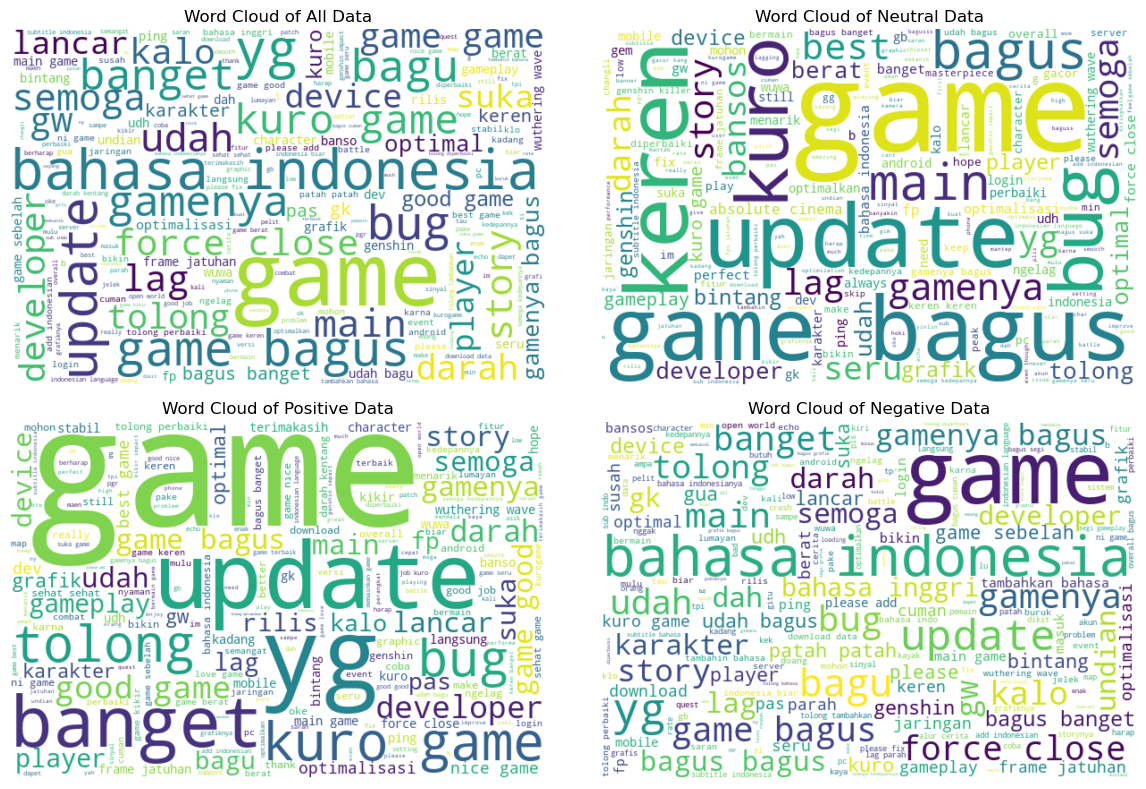

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan teks
all_text = " ".join([" ".join(text) for text in df['text_stopword']])
positive_text = " ".join([" ".join(text) for text in df[df['polarity'] == 'positive']['text_stopword']])
negative_text = " ".join([" ".join(text) for text in df[df['polarity'] == 'negative']['text_stopword']])
neutral_text  = " ".join([" ".join(text) for text in df[df['polarity'] == 'neutral']['text_stopword']])

# Generate WordClouds
wc_all = WordCloud(width=600, height=400, background_color='white').generate(all_text)
wc_pos = WordCloud(width=600, height=400, background_color='white').generate(positive_text)
wc_neg = WordCloud(width=600, height=400, background_color='white').generate(negative_text)
wc_neutral = WordCloud(width=600, height=400, background_color='white').generate(neutral_text)

# Tampilkan dalam grid 2x2
plt.figure(figsize=(12, 8))

# Semua data
plt.subplot(2, 2, 1)
plt.imshow(wc_all, interpolation='bilinear')
plt.title("Word Cloud of All Data")
plt.axis("off")

# Netral (kanan atas)
plt.subplot(2, 2, 2)
plt.imshow(wc_neutral, interpolation='bilinear')
plt.title("Word Cloud of Neutral Data")
plt.axis("off")

# Positif (kiri bawah)
plt.subplot(2, 2, 3)
plt.imshow(wc_pos, interpolation='bilinear')
plt.title("Word Cloud of Positive Data")
plt.axis("off")

# Negatif (kanan bawah)
plt.subplot(2, 2, 4)
plt.imshow(wc_neg, interpolation='bilinear')
plt.title("Word Cloud of Negative Data")
plt.axis("off")

plt.tight_layout()
plt.show()


### Data Splitting

In [12]:
from sklearn.model_selection import train_test_split
# Split data menjadi training dan testing
X = df['text_akhir']  # Teks yang sudah diproses
y = df['polarity']  # Label polaritas sentimen (misalnya, 'positive', 'negative')

X_train_7030, X_test_7030, y_train_7030, y_test_7030 = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# Sementara untuk Word2Vec dan FastText tetap 80:20
X_train_8020, X_test_8020, y_train_8020, y_test_8020 = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


In [13]:
print("Train data class distribution:")
print(y_train_8020.value_counts())

print("Test data class distribution:")
print(y_test_8020.value_counts())


Train data class distribution:
polarity
positive    7612
negative    6289
neutral     4053
Name: count, dtype: int64
Test data class distribution:
polarity
positive    1903
negative    1572
neutral     1014
Name: count, dtype: int64


In [14]:
print(set(y_train_7030))  # Memeriksa label yang ada di training set
print(set(y_test_7030))  # Memeriksa label yang ada di test set


{'neutral', 'negative', 'positive'}
{'neutral', 'negative', 'positive'}


In [23]:
from sklearn.preprocessing import LabelEncoder

# Encode label ke numerik
label_encoder = LabelEncoder()
y_train_7030_enc = label_encoder.fit_transform(y_train_7030)
y_test_7030_enc = label_encoder.transform(y_test_7030)

y_train_8020_enc = label_encoder.fit_transform(y_train_8020)
y_test_8020_enc = label_encoder.transform(y_test_8020)

In [25]:
from tensorflow.keras.utils import to_categorical

y_train_7030_cat = to_categorical(y_train_7030_enc, num_classes=3)
y_test_7030_cat = to_categorical(y_test_7030_enc, num_classes=3)

y_train_8020_cat = to_categorical(y_train_8020_enc, num_classes=3)
y_test_8020_cat = to_categorical(y_test_8020_enc, num_classes=3)

## Modelling

### Skema 1: RNN (LSTM) + Word2Vec + Pembagian Data 70:30

In [18]:
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Bidirectional, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
import numpy as np

In [ ]:
# Tokenisasi
tokenized_train = [text.split() for text in X_train_8020]
tokenized_test = [text.split() for text in X_test_8020]

# Latih Word2Vec
w2v_model = Word2Vec(sentences=tokenized_train, vector_size=100, window=5, min_count=1, workers=4)

# Tokenizer untuk indexing
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_8020)
X_train_seq = tokenizer.texts_to_sequences(X_train_8020)
X_test_seq = tokenizer.texts_to_sequences(X_test_8020)

# Padding
max_len = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Embedding matrix
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

# Callback EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight

# Misalnya, y_train_8020_enc adalah array label pelatihan
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_8020_enc)

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=embedding_matrix.shape[0], 
                         output_dim=100,
                         weights=[embedding_matrix], 
                         input_length=max_len, 
                         trainable=True))

model_lstm.add(Bidirectional(LSTM(64, return_sequences=False, kernel_regularizer=l2(0.05))))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model_lstm.add(Dense(3, activation='softmax'))  # Output layer untuk 3 kelas

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
history_lstm = model_lstm.fit(
    X_train_pad, y_train_8020_cat,
    epochs=10,
    batch_size=16,
    validation_data=(X_test_pad, y_test_8020_cat),
    sample_weight=sample_weights,
    callbacks=[early_stop],
    verbose=1
)

# Akurasi
train_accuracy_1 = history_lstm.history['accuracy'][-1]
test_accuracy_1 = history_lstm.history['val_accuracy'][-1]

print(f"Akurasi data train [Model RNN(LSTM) + Word2Vec]: {train_accuracy_1:.2f}")
print(f"Akurasi data tes [Model RNN(LSTM) + Word2Vec]: {test_accuracy_1:.2f}")


Epoch 1/10


c:\Users\LEGION\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1123/1123 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.5849 - loss: 2.9966 - val_accuracy: 0.8256 - val_loss: 0.5822
Epoch 2/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 27s 24ms/step - accuracy: 0.8562 - loss: 0.5183 - val_accuracy: 0.8630 - val_loss: 0.4827
Epoch 3/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 0.9118 - loss: 0.3652 - val_accuracy: 0.8726 - val_loss: 0.4530
Akurasi data train [Model RNN(LSTM) + Word2Vec]: 0.91
Akurasi data tes [Model RNN(LSTM) + Word2Vec]: 0.87


### Skema 2: RNN + FastText + Pembagian Data 80:20

In [53]:
import gensim.downloader as api
from tensorflow.keras.layers import BatchNormalization

In [37]:
fasttext_model = api.load("fasttext-wiki-news-subwords-300")

# Tokenizer dan Padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_8020)
X_train_seq = tokenizer.texts_to_sequences(X_train_8020)
X_test_seq = tokenizer.texts_to_sequences(X_test_8020)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Embedding matrix FastText
embedding_matrix_ft = np.zeros((len(tokenizer.word_index) + 1, 300))
for word, i in tokenizer.word_index.items():
    if word in fasttext_model:
        embedding_matrix_ft[i] = fasttext_model[word]

In [56]:
# Model RNN dengan Ekstraksi fitur FastText
model_2 = Sequential()
model_2.add(Embedding(input_dim=embedding_matrix_ft.shape[0],
                      output_dim=300,
                      weights=[embedding_matrix_ft],
                      input_length=max_len,
                      trainable=True))  
model_2.add(LSTM(64, dropout=0.4, recurrent_dropout=0.4))
model_2.add(BatchNormalization())
model_2.add(Dense(16, activation='relu', kernel_regularizer=l2(0.05)))  # Tambahan hidden layer
model_2.add(Dense(3, activation='softmax'))  # Multi-class classification

model_2.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Train model
history_2 = model_2.fit(
    X_train_pad, y_train_8020_cat,  # <- pakai label one-hot
    epochs=10,
    batch_size=32,
    validation_data=(X_test_pad, y_test_8020_cat),  # <- pakai label one-hot
    sample_weight=sample_weights,
    callbacks=[early_stop],
    verbose=1
)

# Akurasi
train_accuracy_2 = history_2.history['accuracy'][-1]
test_accuracy_2 = history_2.history['val_accuracy'][-1]

print(f"Akurasi data train [RNN(LSTM) + FastText]: {train_accuracy_2:.2f}")
print(f"Akurasi data tes [RNN(LSTM) + FastText]: {test_accuracy_2:.2f}")

Epoch 1/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.6857 - loss: 1.3489 - val_accuracy: 0.8637 - val_loss: 0.4212
Epoch 2/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.8897 - loss: 0.3618 - val_accuracy: 0.8960 - val_loss: 0.3293
Epoch 3/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.9344 - loss: 0.2341 - val_accuracy: 0.8984 - val_loss: 0.3181
Epoch 4/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step - accuracy: 0.9535 - loss: 0.1724 - val_accuracy: 0.8879 - val_loss: 0.3360
Epoch 5/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.9641 - loss: 0.1369 - val_accuracy: 0.8986 - val_loss: 0.3407
Epoch 6/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - accuracy: 0.9748 - loss: 0.1029 - val_accuracy: 0.8851 - val_loss: 0.3757
Akurasi data train [RNN(LSTM) + FastText]: 0.97
Akurasi data tes [RNN(LSTM) + FastText]: 0.89


### Skema 3: RNN + TF-IDF + Pembagian Data 70:30

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
# TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Menggunakan lebih sedikit fitur
X_train_tfidf = tfidf.fit_transform(X_train_7030).toarray()
X_test_tfidf = tfidf.transform(X_test_7030).toarray()

timesteps = 50  # Menyesuaikan ukuran timesteps
features = X_train_tfidf.shape[1] // timesteps 
X_train_tfidf_reshaped = X_train_tfidf.reshape((X_train_tfidf.shape[0], timesteps, features))
X_test_tfidf_reshaped = X_test_tfidf.reshape((X_test_tfidf.shape[0], timesteps, features))

# EarlyStopping
sample_weights_7030 = compute_sample_weight(class_weight='balanced', y=y_train_7030_enc)

In [59]:
model_3 = Sequential()
model_3.add(Bidirectional(GRU(256, input_shape=(timesteps, features), activation='tanh', return_sequences=True)))  # Tambahkan layer GRU lebih besar
model_3.add(Bidirectional(GRU(128, activation='tanh', return_sequences=True)))  # Layer GRU kedua
model_3.add(Dropout(0.4))  # Regularisasi dengan Dropout lebih tinggi
model_3.add(Bidirectional(GRU(64, activation='tanh')))  # Layer GRU ketiga
model_3.add(Dropout(0.4))  # Regularisasi dengan Dropout lebih tinggi
model_3.add(Dense(3, activation='softmax'))  # Output layer untuk multi-class

# Compile model
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history_3 = model_3.fit(X_train_tfidf_reshaped, y_train_7030_cat,
                        epochs=20,  # Meningkatkan jumlah epoch
                        batch_size=32,  # Bereksperimen dengan batch size lebih kecil
                        validation_data=(X_test_tfidf_reshaped, y_test_7030_cat),
                        sample_weight=sample_weights_7030,
                        verbose=1)

# Akurasi
train_accuracy_3 = history_3.history['accuracy'][-1]
test_accuracy_3 = history_3.history['val_accuracy'][-1]

print(f"Akurasi data train [GRU + TF-IDF]: {train_accuracy_3:.3f}")
print(f"Akurasi data tes   [GRU + TF-IDF]: {test_accuracy_3:.3f}")

c:\Users\LEGION\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 84s 154ms/step - accuracy: 0.4948 - loss: 0.9941 - val_accuracy: 0.6915 - val_loss: 0.7170
Epoch 2/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 66s 134ms/step - accuracy: 0.7188 - loss: 0.6859 - val_accuracy: 0.7425 - val_loss: 0.6240
Epoch 3/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 67s 135ms/step - accuracy: 0.7618 - loss: 0.5976 - val_accuracy: 0.7303 - val_loss: 0.6569
Epoch 4/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 67s 136ms/step - accuracy: 0.7873 - loss: 0.5534 - val_accuracy: 0.7913 - val_loss: 0.5363
Epoch 5/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 68s 138ms/step - accuracy: 0.7987 - loss: 0.5317 - val_accuracy: 0.7867 - val_loss: 0.5409
Epoch 6/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 67s 137ms/step - accuracy: 0.8059 - loss: 0.5078 - val_accuracy: 0.7900 - val_loss: 0.5606
Epoch 7/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 67s 137ms/step - accuracy: 0.8175 - loss: 0.4778 - val_accuracy: 0.8075 - val_loss: 0.5060
Epoch 8/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 68s 138ms/step - accuracy: 0.8279 - loss: 0

### Hasil Modelling

In [63]:
results = {
    "RNN + Word2Vec": (train_accuracy_1, test_accuracy_1),
    "RNN + FastText": (train_accuracy_2, test_accuracy_2),
    "RNN + TF-IDF": (train_accuracy_3, test_accuracy_3)
}

for model_name, (train_acc, test_acc) in results.items():
    print(f"{model_name} => Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")

RNN + Word2Vec => Train Accuracy: 0.9099 | Test Accuracy: 0.8726
RNN + FastText => Train Accuracy: 0.9734 | Test Accuracy: 0.8851
RNN + TF-IDF => Train Accuracy: 0.8903 | Test Accuracy: 0.8256


## Inference/Testing Output

In [ ]:
label_map = {0: 'negatif', 1: 'positif', 2: 'neutral'}